### Why is Logistic Regression Important?

Logistic Regression is a fundamental classification algorithm in Machine Learning for the following reasons:

##### 1. Simplicity and Interpretability
- Easy to understand and implement.
- Model coefficients (β) explain how each feature affects the **probability** of the outcome.
- A positive coefficient increases the likelihood of the positive class, while a negative coefficient decreases it.
- Useful for explaining predictions in real-world decision-making.

##### 2. Efficiency
- Computationally efficient and fast to train.
- Works well with large datasets and real-time prediction systems.
- Requires less memory compared to complex models.

##### 3. Foundation for Other Models
- Helps in understanding key ML concepts like:
  - Classification
  - Probability estimation
  - Decision boundaries
- Forms the basis for more advanced models such as neural networks and generalized linear models.

In [4]:
# 1. Import Libraries and Prepare Data
# We'll use make_classification from Scikit-learn to create a synthetic dataset suitable for binary classification.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification

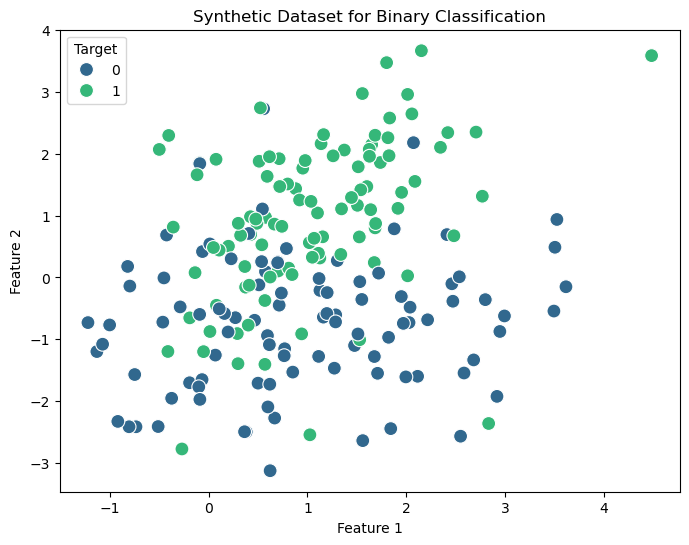

In [7]:
np.random.seed(42)
X,y  = make_classification(
    n_samples=200,       # Number of samples
    n_features=2,        # Number of features
    n_informative=2,     # Number of informative features
    n_redundant=0,       # Number of redundant features
    n_clusters_per_class=1,
    flip_y=0.1,          # Percentage of samples with flipped labels
    random_state=42
)

X_df = pd.DataFrame(X, columns=['Feature_1','Feature_2'])
y_df = pd.DataFrame(y, columns=['Target'])

plt.figure(figsize=(8,6))
sns.scatterplot(data=X_df, x='Feature_1', y='Feature_2', hue=y_df['Target'], palette='viridis', s=100)
plt.title('Synthetic Dataset for Binary Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Target')
plt.show()

The dataset shows two overlapping classes with some noise, moderate linear separability, slight correlation between features, and a few outliers—ideal for testing binary classification models like Logistic Regression.

In [8]:
# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 140 samples
Testing set size: 60 samples


In [10]:
# 3. Initialize and Train the Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
print('Logistic Regression trained Successfully!')

Logistic Regression trained Successfully!


In [12]:
# 4. Understanding the Model Coefficients
intercept = model.intercept_[0]
coefficients = model.coef_[0]
print(f'Intercept (β₀): {intercept:.4f}')
print(f'Coefficients (β₁ for Feature_1, β₂ for Feature_2): {coefficients[0]:.4f}, {coefficients[1]:.4f}')

Intercept (β₀): 0.0883
Coefficients (β₁ for Feature_1, β₂ for Feature_2): -0.1176, 0.9035


In [13]:
# 5. Predicting Class Labels with predict()
y_pred = model.predict(X_test)
print('First 10 predictions:', y_pred[:10])
print('First 10 actual values:', y_test[:10])

First 10 predictions: [1 0 1 1 1 1 1 1 0 1]
First 10 actual values: [1 0 1 1 1 1 0 1 0 1]


In [17]:
# 6.Predicting Probabilities with predict_proba()
# The predict_proba() method is often more informative than predict() because it returns the probability of each class for each data point. 
# For binary classification, it returns an array where each row corresponds to a data point, and the columns represent the probability of 
# belonging to class 0 and class 1, respectively.

y_predict_proba = model.predict_proba(X_test)
print('First 10 probability predictions (Class 0, Class 1): ', y_predict_proba[:10])

First 10 probability predictions (Class 0, Class 1):  [[0.47275261 0.52724739]
 [0.80618091 0.19381909]
 [0.28959042 0.71040958]
 [0.17865214 0.82134786]
 [0.09973385 0.90026615]
 [0.25243021 0.74756979]
 [0.41433584 0.58566416]
 [0.37737501 0.62262499]
 [0.67076469 0.32923531]
 [0.38317745 0.61682255]]


In [22]:
# 7. Evaluating Classification Models: null, Precision, Recall, and F1-Score
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ', conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

class_report = classification_report(y_test, y_pred, target_names=['Class0', 'Class1'])
print('Classification Report: ', class_report)

Confusion Matrix:  [[26  4]
 [ 2 28]]
Accuracy:  0.9
Classification Report:                precision    recall  f1-score   support

      Class0       0.93      0.87      0.90        30
      Class1       0.88      0.93      0.90        30

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



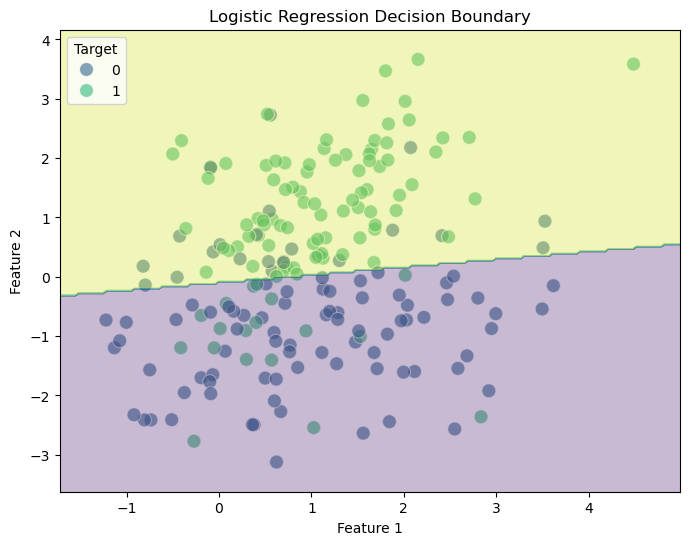

In [23]:
# 8. Visualizing the Decision Boundary
plt.figure(figsize=(8,6))
sns.scatterplot(data=X_df, x='Feature_1', y='Feature_2', hue=y_df['Target'], palette='viridis', s=100, alpha=0.6)
intercept = model.intercept_[0]
coefficients = model.coef_[0]

# Calculate the points for the decision boundary line
# We need to find x1 and x2 such that intercept + coef1*x1 + coef2*x2 = 0
# Let's iterate over the range of Feature_1 values and calculate the corresponding Feature_2 values
x1_min, x1_max = X_df['Feature_1'].min() - 0.5, X_df['Feature_1'].max() + 0.5
x2_min, x2_max = X_df['Feature_2'].min() - 0.5, X_df['Feature_2'].max() + 0.5

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 200), np.linspace(x2_min, x2_max, 200))

# Predict the class for each point in the meshgrid
# We need to reshape xx and yy to be compatible with the model's predict method
mesh_data = np.c_[xx.ravel(), yy.ravel()]
z = model.predict(mesh_data)

# Reshape the predictions to match the meshgrid shape
z = z.reshape(xx.shape)

# Plot the decision boundary and the regions
plt.contourf(xx, yy, z, cmap='viridis', alpha=0.3)

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Target')
plt.show()

### Why are Decision Boundaries Important?

Decision boundaries help us understand how a machine learning model separates different classes in the feature space.

##### 1. Understanding Model Behavior
They provide a visual representation of how the model makes decisions. You can see which regions of the feature space are classified as which class.

##### 2. Identifying Model Limitations
If the decision boundary is too simple (e.g., a straight line) for complex data, it indicates that the model might be underfitting. Conversely, a boundary that perfectly separates training data but does not generalize well suggests overfitting.

##### 3. Feature Engineering Insights
Visualizing decision boundaries can sometimes suggest how to engineer new features that might help create a more effective boundary.

##### 4. Basis for More Complex Models
While logistic regression creates linear boundaries, understanding this concept is foundational for comprehending non-linear boundaries created by algorithms like Support Vector Machines with kernels or neural networks.